# Plotting Mekong Development Map by Choropleth Maps

>A choropleth map is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.

## Terminologies
---

## [Plotly](https://plotly.com/)
Plotly is a technical computing company that develops online data analytics and visualization tools. Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

### [plotly.py](https://plotly.com/python/)
An interactive, open-source, and browser-based graphing library for Python.

### [GeoJSON](https://geojson.org/)
An open standard format designed for representing simple geographical features, along with their non-spatial attributes.

### [Mapbox](https://mapbox.com/)
An open source mapping platform for custom designed maps.

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
# import cufflinks as cf
# import chart_studio.plotly as py
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# # Use Plotly locally
# cf.go_offline()

## 1 Mekong Infrastructure Tracker

In [2]:
# Import geodata
mekong_geo = json.load(open("mekong/mekong_infrastructure_tracker.geojson", "r", encoding='utf8'))
mekong_df = pd.read_csv('mekong/mekong_infrastructure.csv')

In [3]:

#Edit data
mek_df = mekong_df[['Project Name','Subtype','Year of Completion','Capacity (MW)','Latitude','Longitude']]
mek_df['text'] = mek_df['Project Name'] + '<br> Capacity ' + (mek_df['Capacity (MW)']).astype(str)+'W'
mek_df['Capacity'] = mek_df['Capacity (MW)'].fillna(0)

C:\Users\msduo\AppData\Local\Temp/ipykernel_16200/3753918795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mek_df['text'] = mek_df['Project Name'] + '<br> Capacity ' + (mek_df['Capacity (MW)']).astype(str)+'W'
C:\Users\msduo\AppData\Local\Temp/ipykernel_16200/3753918795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mek_df['Capacity'] = mek_df['Capacity (MW)'].fillna(0)


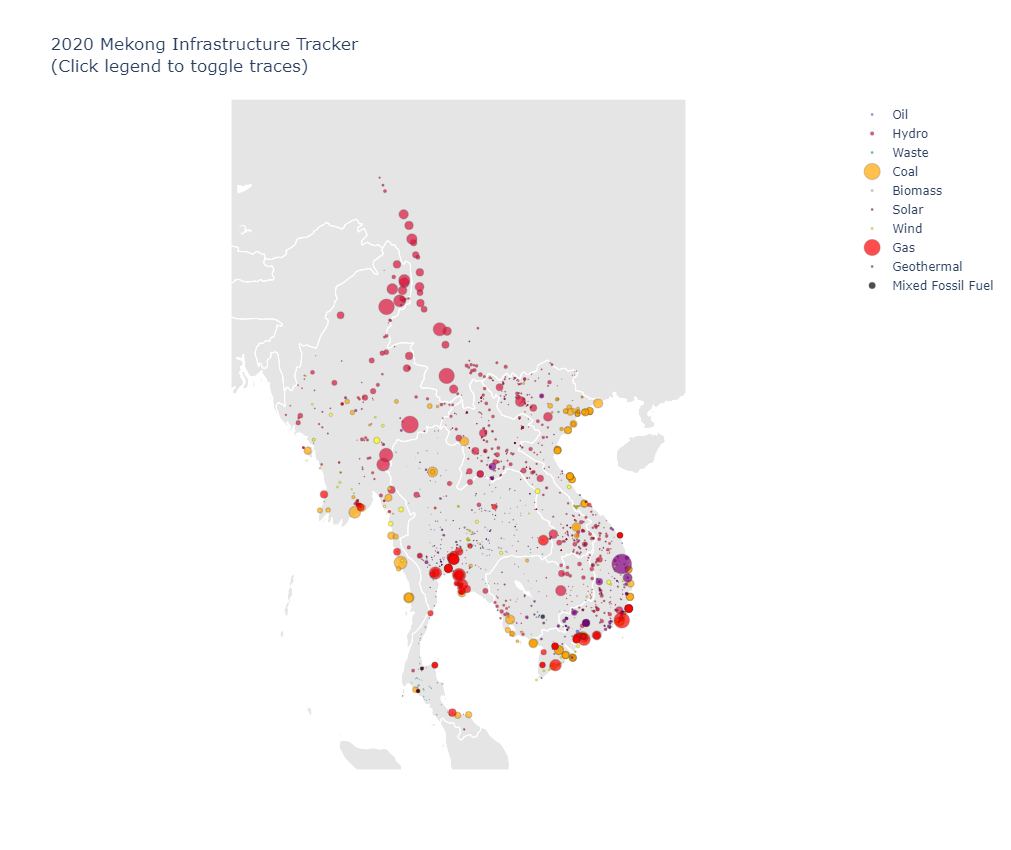

In [7]:
import plotly.graph_objects as go

categories = ['Oil', 'Hydro', 'Waste', 'Coal', 'Biomass', 'Solar', 'Wind', 'Gas', 'Geothermal', 'Mixed Fossil Fuel'] # Order
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey",'purple','yellow','red','darkgreen','black']
# cities]
scale = 50

fig = go.Figure()

for i, cat in enumerate(categories):
    mek_sub = mek_df[mek_df['Subtype']==cat]
    fig.add_trace(go.Scattergeo(
        locationmode = 'geojson-id',
        lon = mek_sub['Longitude'],
        lat = mek_sub['Latitude'],
        text = mek_sub['text'],
        marker = dict(
         size = mek_sub['Capacity']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width= 0.3,
            sizemode = 'area'
        ),
        name = '{}'.format(cat)
    )
    )
fig.update_layout(
        title_text = '2020 Mekong Infrastructure Tracker <br>(Click legend to toggle traces)',
        showlegend = True,
        autosize = False,
        width = 1000,
        height = 850,
        geo = go.layout.Geo(
        resolution = 50,
        scope = 'asia',
        showframe = False,
        showcoastlines = True,
        lonaxis_range = [ 90.0, 112.0 ],
        lataxis_range = [ 5.0, 35.0 ],
        landcolor = "rgb(229, 229, 229)",
        countrycolor = "white" ,
        coastlinecolor = "white",
        projection_type = 'mercator',
        domain = dict(x = [ 0, 1.0 ], y = [ 0, 1.0 ])
    )
)
fig.show()